In [1]:
import os
import cv2
import imghdr
import tensorflow as tf

/var/folders/vz/s3hy81y97bg_smgf63b4gzs00000gn/T/ipykernel_8347/2081441395.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr
2023-04-04 00:01:02.880314: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pathlib

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [31]:
# Define relative path from the current notebook location to the data_set directory
dataset_path = os.path.join('..', '..', 'data_set')

# Get the full absolute path to the data_set directory
full_path = os.path.abspath(dataset_path)

# List the directories in the data_set directory
directories = os.listdir(full_path)

In [32]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(dataset_path):
  print(image_class)

for image_class in os.listdir(dataset_path): 
   
    image_path = os.path.join(dataset_path, image_class)
    try: 
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts: 
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
    except Exception as e: 
        print('Issue with image {}'.format(image_path))

train
validation
Issue with image ../../data_set/train
Issue with image ../../data_set/validation


In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
data = tf.keras.utils.image_dataset_from_directory(dataset_path, labels='inferred')

Found 19 files belonging to 2 classes.


2023-04-04 00:06:38.112414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19]
	 [[{{node Placeholder/_4}}]]
2023-04-04 00:06:38.112997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [19]
	 [[{{node Placeholder/_0}}]]


237.14847

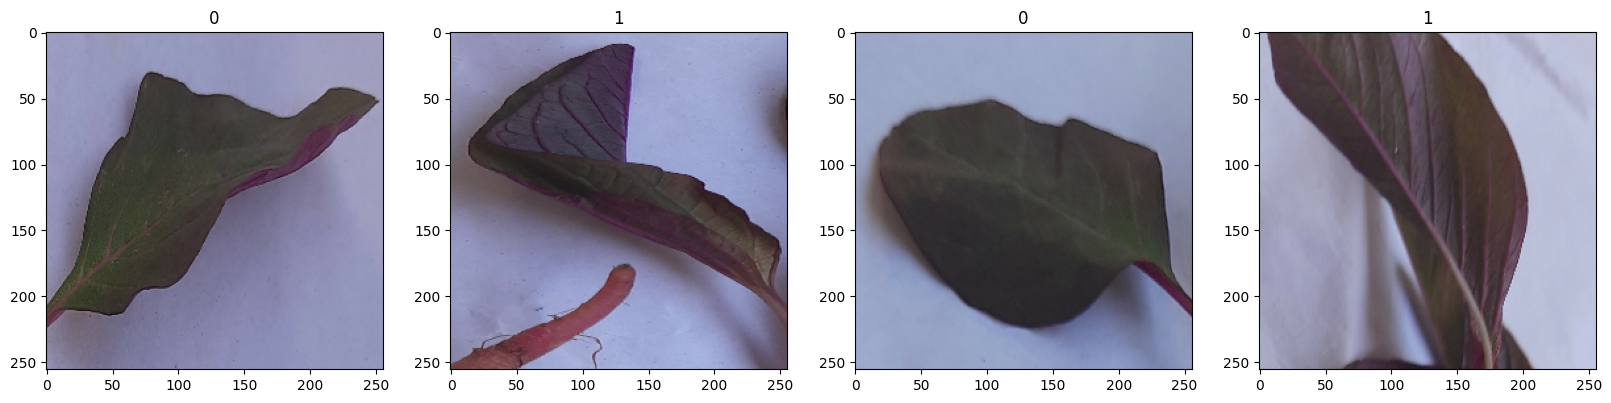

In [34]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

len(batch)

batch[0].shape

batch[1]

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

batch[0].max()

In [25]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()[0].max()

2023-04-04 00:05:44.112225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19]
	 [[{{node Placeholder/_4}}]]
2023-04-04 00:05:44.113782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19]
	 [[{{node Placeholder/_4}}]]


0.929994

In [26]:
len(data)

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

train_size+val_size+test_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

len(train)

0

In [27]:
train

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer = 'adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [28]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [29]:
hist = model.fit(train, epochs=8, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/8


2023-04-04 00:05:45.648961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19]
	 [[{{node Placeholder/_4}}]]
2023-04-04 00:05:45.649690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19]
	 [[{{node Placeholder/_4}}]]


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.